# Demonstration of the Bias-Variance Tradeoff in Statistical Learning

In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [40]:
# Create sigmoid dataset
n = 100
x_1 = np.linspace(-5, 5, n)
true_1 = np.array(list(map(lambda x: 1 / (1 + np.exp(-x)), x_1)))
resid_1 = np.random.normal(0, 0.1, n)

data_1 = true_1 + resid_1
epsilon_1 = mean_squared_error(true_1, data_1)
print('Minimum MSE: {0:.4f}'.format(epsilon_1))

Minimum MSE: 0.0088


In [43]:
# Split data into train and test sets
X_sig_train, X_sig_test, y_sig_train, y_sig_test = train_test_split(x_1, data_1,
                                                                    test_size=0.2,
                                                                    random_state=42)
X_sig_train = X_sig_train.reshape(-1, 1)
X_sig_test = X_sig_test.reshape(-1, 1)

In [44]:
# Fit a linear regression model
lin_reg_sig = LinearRegression()
lin_reg_sig.fit(X_sig_train, y_sig_train)

lin_sig_preds = lin_reg_sig.predict(X_sig_test)
print('Mean Squared Error: {0:.4f}'.format(mean_squared_error(y_sig_test, lin_sig_preds)))

Mean Squared Error: 0.0130


In [45]:
slope = lin_reg_sig.coef_[0]
intercept = lin_reg_sig.intercept_

print('Model slope: {0:.4f}\nModel intercept: {1: .4f}'.format(slope, intercept))

Model slope: 0.1259
Model intercept:  0.4932


In [47]:
# Fit a decision tree model
tree_sig = DecisionTreeRegressor()
tree_sig.fit(X_sig_train, y_sig_train)

tree_sig_preds = tree_sig.predict(X_sig_test)
print('Mean Squared Error: {0:.4f}'.format(mean_squared_error(y_sig_test, tree_sig_preds)))

Mean Squared Error: 0.0104


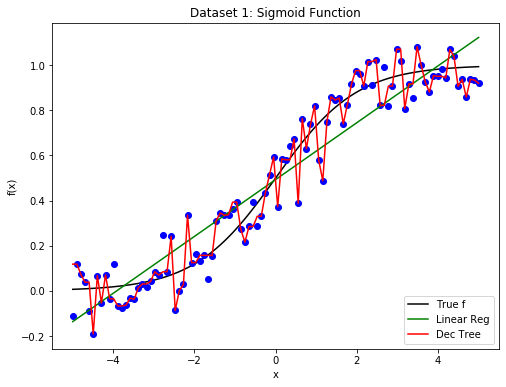

In [49]:
# Plot the underlying sigmoid function and randomized dataset points
plt.figure(figsize=(8, 6));
plt.plot(x_1, true_1, 'k-', label='True f');
plt.plot(x_1, data_1, 'bo', label='');
plt.plot(x_1, x_1 * slope + intercept, 'g-', label='Linear Reg')
plt.plot(x_1, tree_sig.predict(x_1.reshape(-1, 1)), 'r-', label='Dec Tree')
plt.title('Dataset 1: Sigmoid Function');
plt.xlabel('x');
plt.ylabel('f(x)');
plt.legend(loc='lower right');

The tree model is high variance, essentially memorizing the training data and the linear model show high bias as it lacks the flexibility to model the true underlying (non-linear) relationship. The Mean Squared Error for both are very close.

In [70]:
def make_poly_func(x, *args):
    """
    :param x: 1D array of inputs to apply polynomial coefs to
    :param *args: array of np.polyfit coefficients
    :return: f(x) for inputs x using given polynomial coefficients
    """
    deg = len(*args) - 1
    result = np.zeros_like(x)
    for i, coef in enumerate(*args):
        result += coef * (x ** (deg - i))
    return result

In [74]:
deg_1 = np.polyfit(X_sig_train.reshape(-1), y_sig_train, 1)
deg_3 = np.polyfit(X_sig_train.reshape(-1), y_sig_train, 3)
deg_10 = np.polyfit(X_sig_train.reshape(-1), y_sig_train, 10)

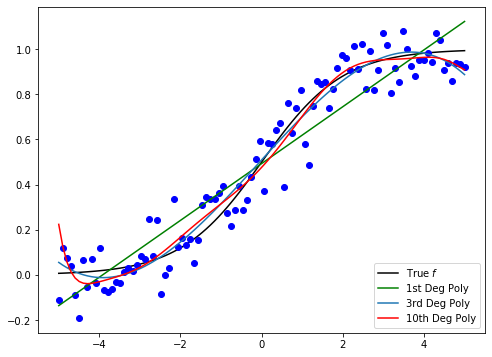

In [76]:
plt.figure(figsize=(8, 6));
plt.plot(x_1, true_1, 'k-', label='True $f$');
plt.plot(x_1, data_1, 'bo', label='');
plt.plot(x_1, make_poly_func(x_1, deg_1), 'g-', label='1st Deg Poly');
plt.plot(x_1, make_poly_func(x_1, deg_3), label='3rd Deg Poly');
plt.plot(x_1, make_poly_func(x_1, deg_10), 'r-', label='10th Deg Poly');
plt.legend(loc='lower right');

In [86]:
# Create multiple polynomial functions increasing in degree
models = []

for d in range(1, 11):
    models.append(np.polyfit(X_sig_train.reshape(-1), y_sig_train, d))

In [88]:
# Aggregate error metrics for all polynomials
train_MSE = []
test_MSE = []

for mod in models:
    train_res = make_poly_func(X_sig_train.reshape(-1), mod)
    train_MSE.append(mean_squared_error(y_sig_train, train_res))
    test_res = make_poly_func(X_sig_test.reshape(-1), mod)
    test_MSE.append(mean_squared_error(y_sig_test, test_res))

print(train_MSE)
print()
print(test_MSE)

[0.01627874504778278, 0.015783218517497186, 0.008185055897404628, 0.008181803099719647, 0.008177771618835445, 0.007857352939629959, 0.007792400254100986, 0.0077564157280431865, 0.007721912565150253, 0.007670800793015342]

[0.01296885901668906, 0.013820477032985754, 0.009677657091517878, 0.009819419705471243, 0.009578719073394032, 0.011261464926642237, 0.011791969452535528, 0.011089946386366798, 0.011985208963061413, 0.013596223346671021]


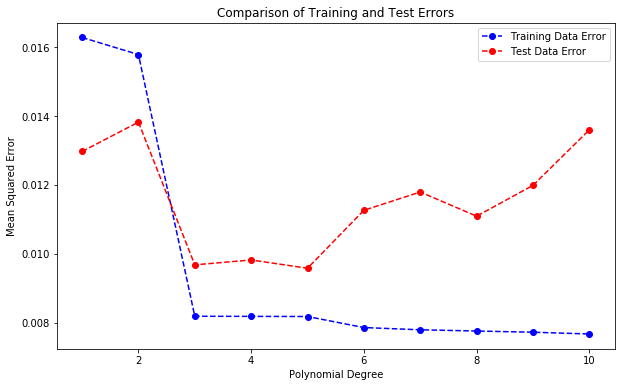

In [89]:
# Plot the training and test error
x_vals = range(1, 11)

plt.figure(figsize=(10, 6));
plt.plot(x_vals, train_MSE, 'bo--', label='Training Data Error');
plt.plot(x_vals, test_MSE, 'ro--', label='Test Data Error');
plt.xlabel('Polynomial Degree');
plt.ylabel('Mean Squared Error');
plt.title('Comparison of Training and Test Errors');
plt.legend();

The lower-order polynomials with degree 1 (a line) and degree 2 (a parabola) are too simple and aren't able to capture the true relationship in the data. These models have both high training and high test error, indicating they're high bias models. In other words, the simplifying assumptions of the models that the data is linear or parabolic is incorrect, therefore they lack the flexibility to properly model the data.

The training error drops off precipitously when the polynomial has degree 3, indicating that said model (and higher order ones) have enough flexibility to capture the underlying true function between the feature and response. The test error remains low through polynomials up to degree 5, after which it starts to climb. This indicates that overfitting is taking place, and the added flexibility of the additional polynomial degrees is creating a high variance situation where the model just memorizes the noise in the data versus the signal.